In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
clothing = pd.read_excel('C:/Users/Ajay/Downloads/Machine learning capstone project/Capstone project 4 Ajay/Womens Clothing Reviews Data.xlsx')

In [3]:
# Inspecting the dataset
clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [4]:
# Checking datatype of columns
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [5]:
# Now Checking for missing values
clothing.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [6]:
# For the columns with less number of missing values:
# Filling the missing values using mode of the column data
clothing.Category = clothing.Category.fillna(clothing.Category.mode()[0])
clothing.Subcategory1 = clothing.Subcategory1.fillna(clothing.Subcategory1.mode()[0])
clothing.SubCategory2 = clothing.SubCategory2.fillna(clothing.SubCategory2.mode()[0])

# For columns with large no of missing values
# Removing the rows with mising values
clothing.dropna(inplace=True)

# Exploratory Data Analysis

In [7]:
# Summary Statistics
clothing.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,19675.000000,19675.000000,19675.000000,19675.000000
mean,920.877865,43.257942,4.183685,0.818297
std,200.907460,12.256779,1.112055,0.385609
min,1.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


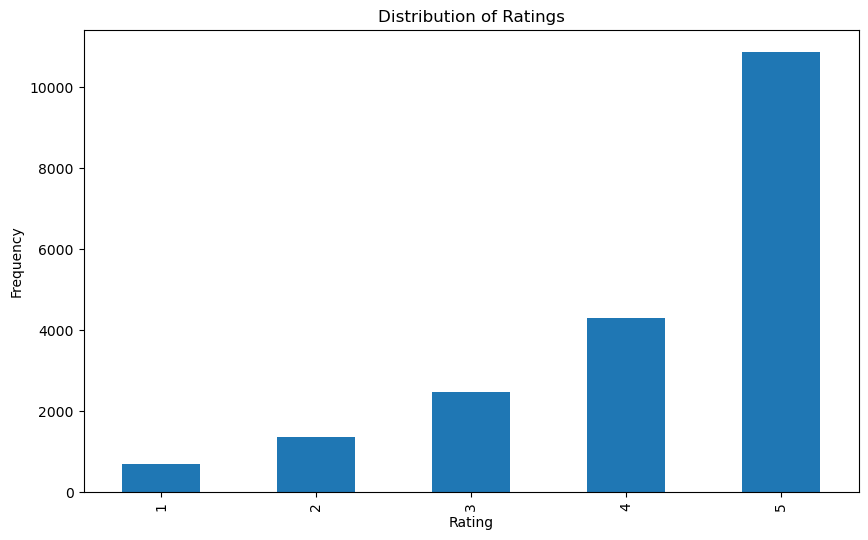

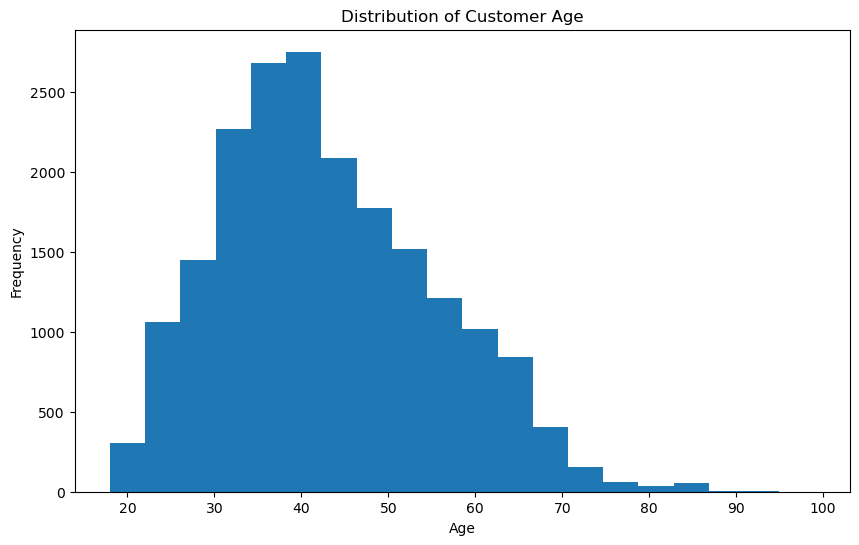

In [8]:
# Rating distribution
plt.figure(figsize=(10, 6))
clothing['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Age groups distribution
plt.figure(figsize=(10, 6))
clothing['Customer Age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Customer Age')
plt.show()

# Review Text Analysis

In [9]:
from wordcloud import WordCloud

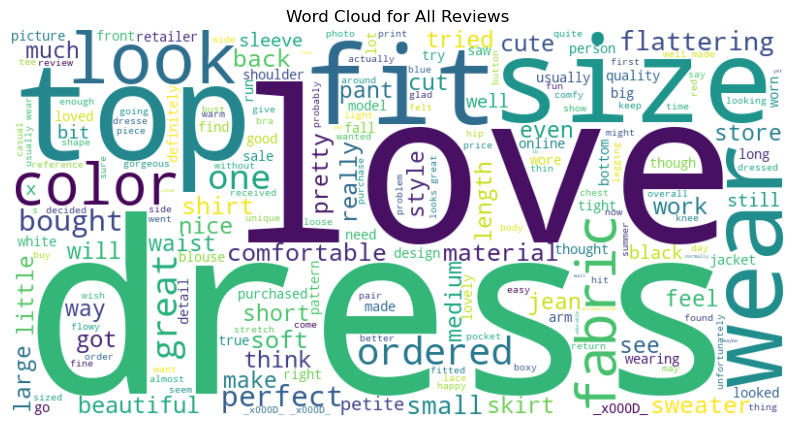

In [10]:
# Combine all reviews into a single text
all_reviews = ' '.join(clothing['Review Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Reviews')
plt.show()

# Text Mining and Sentiment Analysis

1. Sentiment Analysis

In [11]:
from textblob import TextBlob

In [12]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function
clothing['Sentiment'] = clothing['Review Text'].apply(get_sentiment)

# Categorize sentiment
clothing['Sentiment Category'] = clothing['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

A. Word Cloud for positive reviews

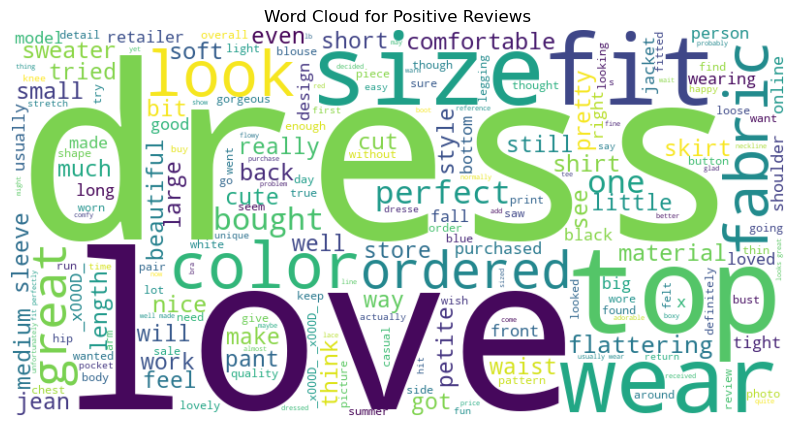

In [13]:
# Combine positive reviews into a single text
positive_reviews = ' '.join(clothing[clothing['Sentiment Category'] == 'Positive']['Review Text'])

# Generate word cloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

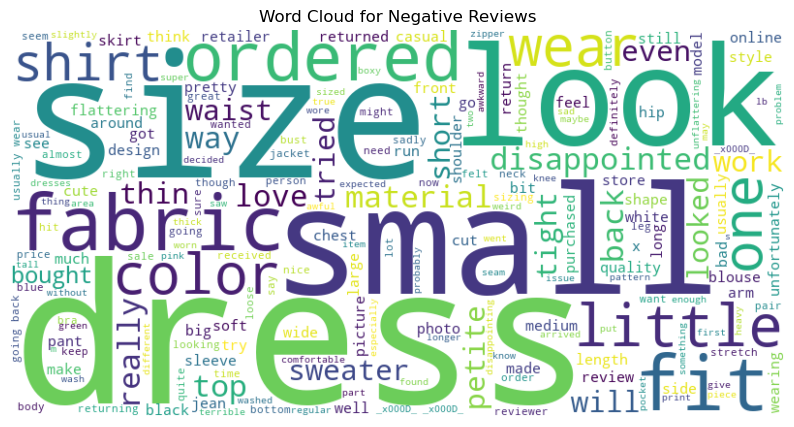

In [14]:
# Combine negative reviews into a single text
negative_reviews = ' '.join(clothing[clothing['Sentiment Category'] == 'Negative']['Review Text'])

# Generate word cloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Sentiment Analysis by category, subcategory and age groups

A. Sentiment by Category

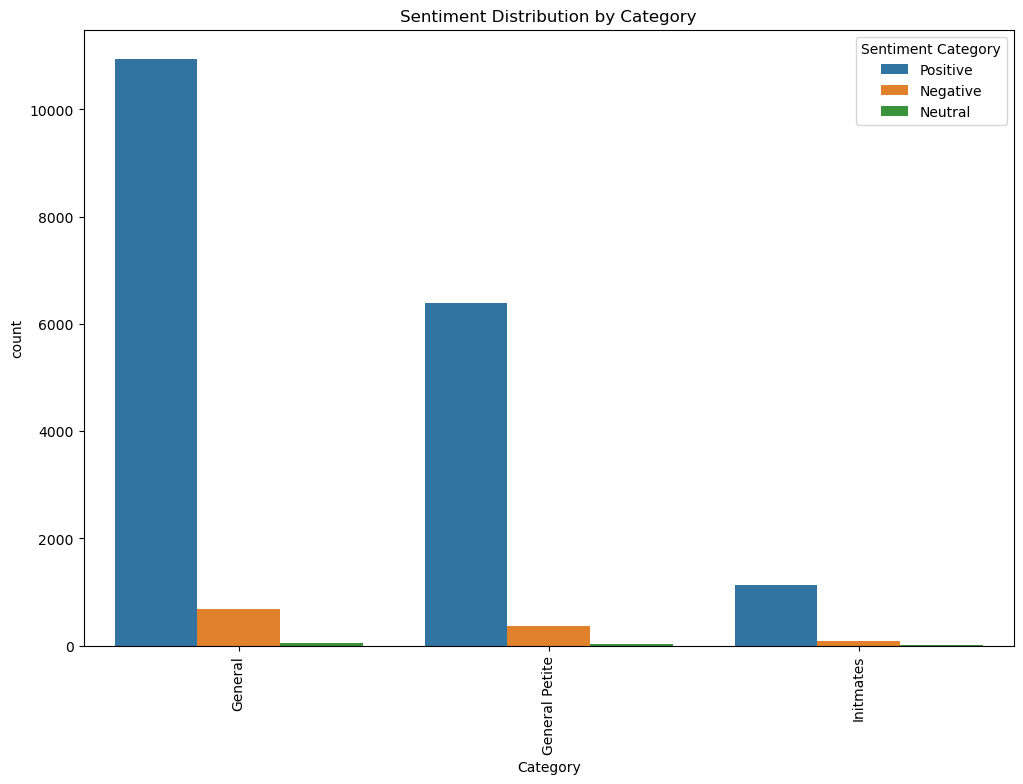

In [15]:
# Sentiment analysis by category
plt.figure(figsize=(12, 8))
sns.countplot(data=clothing, x='Category', hue='Sentiment Category')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Category')
plt.show()

B. Sentiment by location

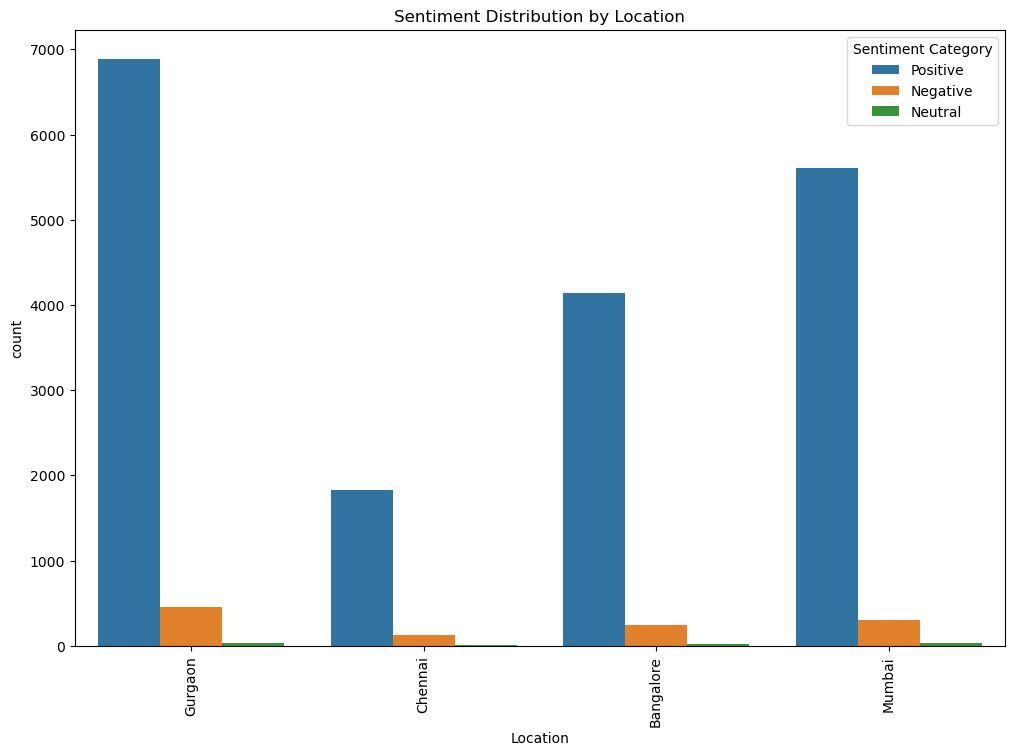

In [16]:
# Sentiment analysis by location
plt.figure(figsize=(12, 8))
sns.countplot(data=clothing, x='Location', hue='Sentiment Category')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Location')
plt.show()

C. Sentiment by Age Groups

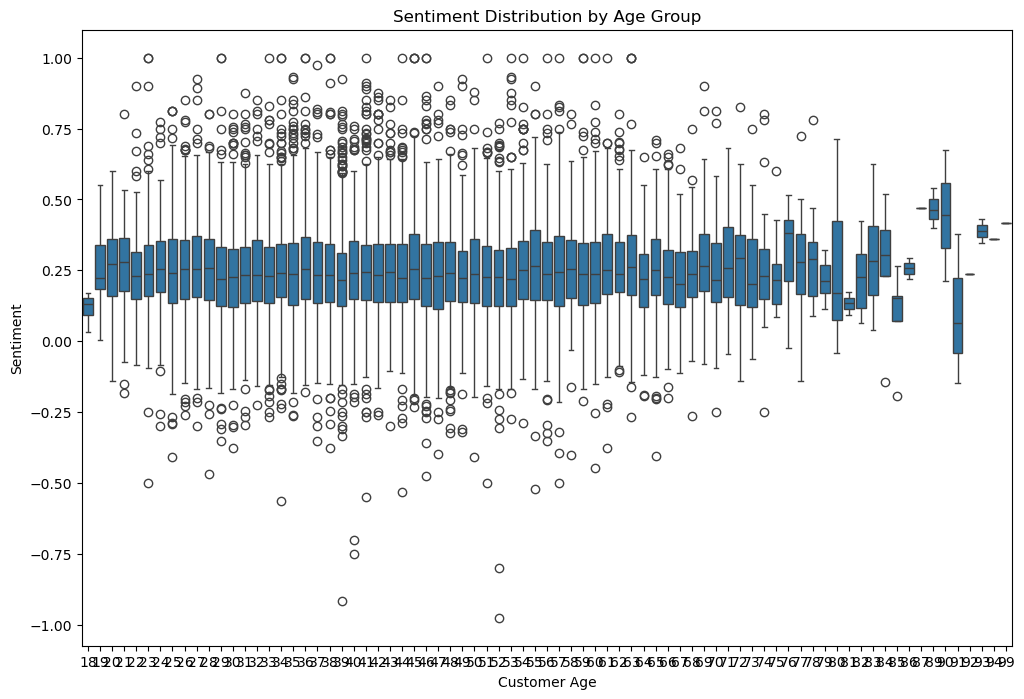

In [17]:
# Sentiment analysis by age group
plt.figure(figsize=(12, 8))
sns.boxplot(data=clothing, x='Customer Age', y='Sentiment')
plt.title('Sentiment Distribution by Age Group')
plt.show()

D. Sentiment by Subcategory1

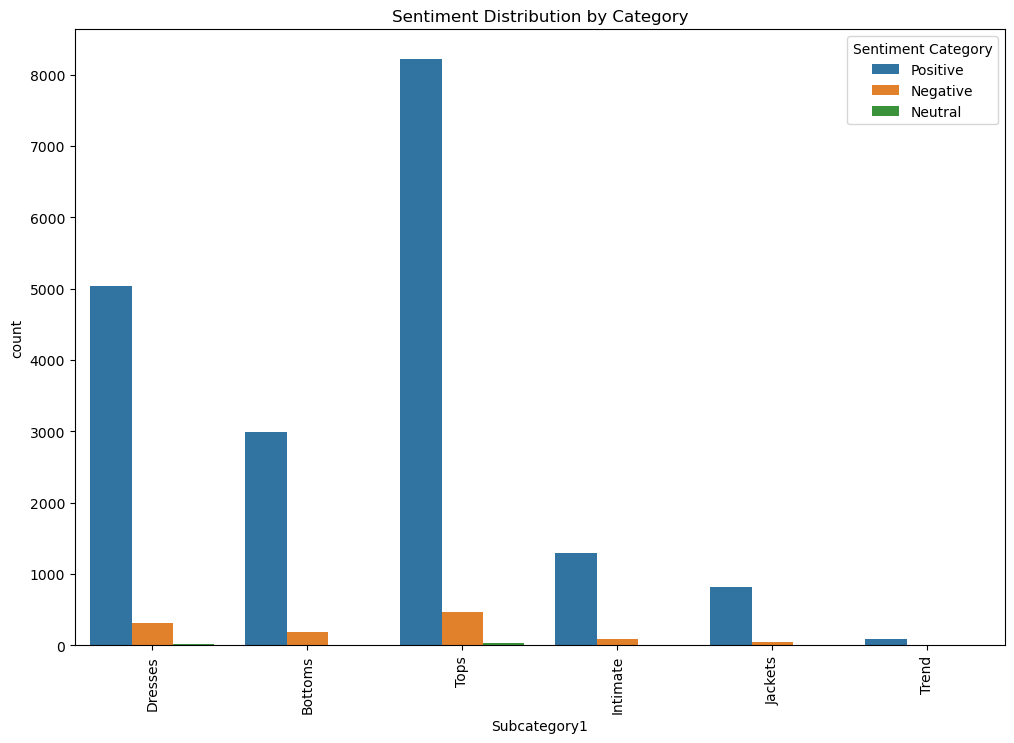

In [18]:
# Sentiment analysis by Subcategory1
plt.figure(figsize=(12, 8))
sns.countplot(data=clothing, x='Subcategory1', hue='Sentiment Category')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Category')
plt.show()

E. Sentiment by Subcategory2

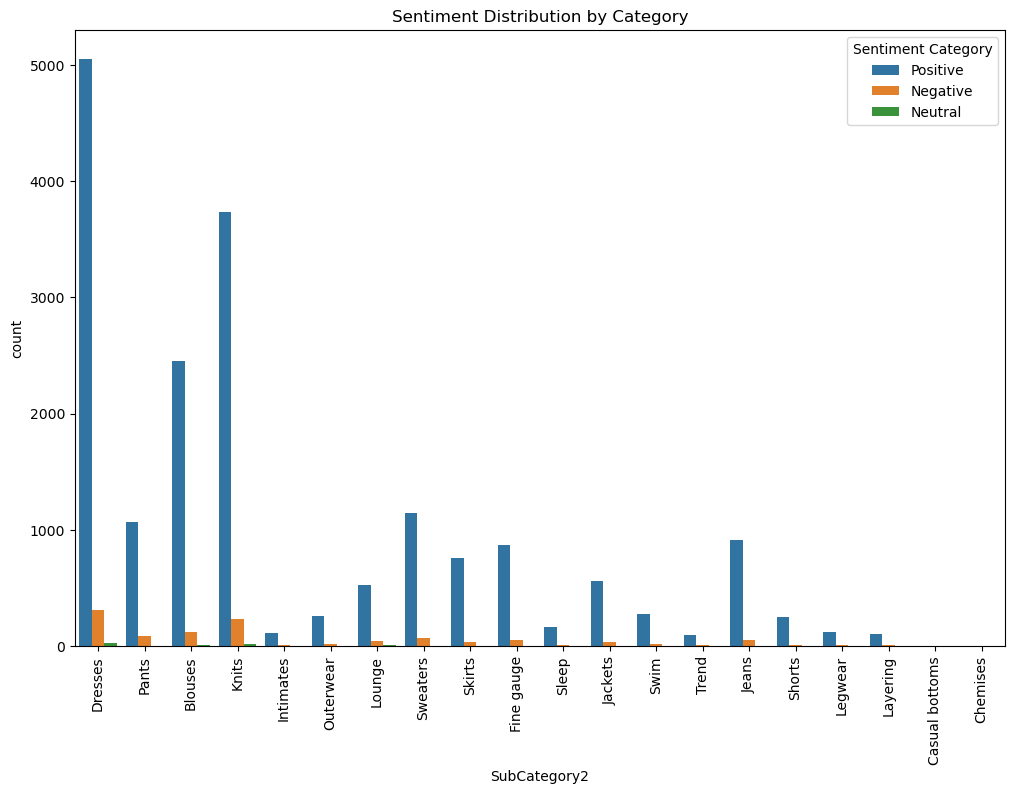

In [19]:
# Sentiment analysis by Subcategory2
plt.figure(figsize=(12, 8))
sns.countplot(data=clothing, x='SubCategory2', hue='Sentiment Category')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Category')
plt.show()

# Predictive Analysis

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Feature engineering
X = clothing[['Rating', 'Sentiment']]
y = clothing['Recommend Flag']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['Sentiment'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation

In [23]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1034   95]
 [ 275 4499]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1129
           1       0.98      0.94      0.96      4774

    accuracy                           0.94      5903
   macro avg       0.88      0.93      0.90      5903
weighted avg       0.94      0.94      0.94      5903



# Review Prediction based on Reviews

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [25]:
# Prepare the data
X_text = clothing['Review Text']
y_rating = clothing['Rating']

# Train-test split
X_train_text, X_test_text, y_train_rating, y_test_rating = train_test_split(X_text, y_rating, test_size=0.3, random_state=42)

In [26]:
# Create a pipeline for text data
pipeline = make_pipeline(TfidfVectorizer(), LinearRegression())
pipeline.fit(X_train_text, y_train_rating)

# Predict and evaluate
y_pred_rating = pipeline.predict(X_test_text)
print("Mean Squared Error:", mean_squared_error(y_test_rating, y_pred_rating))

Mean Squared Error: 2.164867704545975


# Topic Modeling
Using Latent Dirichlet Allocation (LDA) to discover topics in reviews.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(clothing['Review Text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_vec)

LatentDirichletAllocation(n_components=5, random_state=42)

In [29]:
# Display topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic #0:
size dress small fit like ordered large _x000d_ fabric medium
Topic #1:
dress store like online just tried saw looked loved love
Topic #2:
dress wear sweater love perfect fabric beautiful _x000d_ flattering like
Topic #3:
love great color wear comfortable soft perfect bought shirt black
Topic #4:
fit like size love just pants length jeans long petite


# Exploratory Dashboard

Streamlit Dashboard app python script is provided in the destination folder along with the ipynb source file.

Running the Streamlit app

In [31]:
!streamlit run app.py

^C
